Import the relevant libraries which are numpy and Matplotlib

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(100000, 2)


create the target we will aim at

In [3]:
# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 13*xs - 7*zs + 12 + noise

# Check the shape of the targets just in case.
print (targets.shape)

(100000, 1)


plot the training data

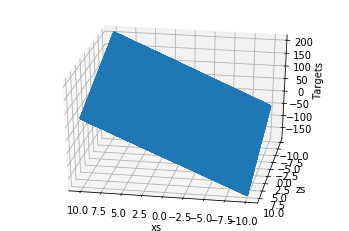

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

Creating the Algorithm

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.07190517]
 [-0.08675839]]
[-0.02555114]


Set a learning Rate

In [6]:
learning_rate = 0.0001

Train the mnodel
this consists of the following steps
- calculate the outputs
- calculate the loss function using the L2-norm formula
- print the loss
- update the weights and the loss using the gradient descent method

In [7]:
# using an iterator
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    # calculate the loss using the L2-norm formular
    loss = np.sum(deltas **2)/observations #average loss
    print(loss)
    # update the weight and the biases for the next iteration
    deltas_scaled = deltas/observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

7440.869349706188
7392.283037921105
7344.019888836548
7296.077751792941
7248.454490443681
7201.147982659871
7154.15612043572
7107.476809794538
7061.107970695367
7015.047536940253
6969.293456082096
6923.843689333155
6878.696211474129
6833.8490107638745
6789.300088849682
6745.047460678194
6701.089154406884
6657.423211316143
6614.047685721945
6570.960644889078
6528.160168944992
6485.64435079418
6443.411296033141
6401.459122865929
6359.785962020235
6318.389956664037
6277.269262322823
6236.422046797336
6195.846490081888
6155.540784283206
6115.503133539822
6075.731753942
6036.224873452196
5996.9807318260455
5957.997580533883
5919.273682682766
5880.807312939048
5842.596757451434
5804.640313774575
5766.936290793149
5729.48300864647
5692.278798653579
5655.322003238835
5618.610975858026
5582.144080924933
5545.919693738414
5509.9362004099585
5474.191997791731
5438.68549340509
5403.415105369571
5368.379262332374
5333.576403398282
5299.004978060077
5264.663446129396
5230.550277668067
5196.663952919

In [8]:
print(weights, biases)

[[ 3.64123928]
 [-2.04870599]] [0.09663822]


Plot the output with the target

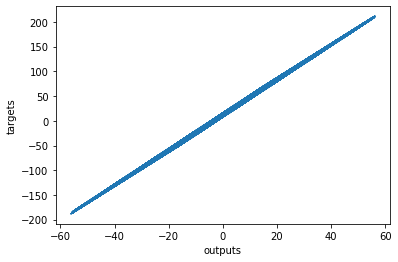

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()